In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load the CSV files into dataframes
f1_scores_df = pd.read_csv("f1_scores.csv")
rouge1_scores_df = pd.read_csv("rouge1_scores.csv")
rouge2_scores_df = pd.read_csv("rouge2_scores.csv")
rougeL_scores_df = pd.read_csv("rougeL_scores.csv")
vec2_df = pd.read_csv("word2vec.csv")
length_df = pd.read_csv("length.csv")
bleu_df = pd.read_csv("bleu_scores.csv")

# Define the new dataframe columns
new_columns = [
    "Name",
    "Generated_Texts",
    "F1_Score",
    "Rouge1",
    "Rouge2",
    "RougeL",
    "Length",
    "Vec2",
    "Bleu"
]

# Initialize an empty list to store data rows
combined_data = []

# Iterate through each row in the f1_scores_df dataframe
for index, row in f1_scores_df.iterrows():
    name = row["Name"]
    f1_scores = [row["F1 Score 1"], row["F1 Score 2"], row["F1 Score 3"]]
    rouge1_scores = rouge1_scores_df[rouge1_scores_df["Name"] == name].values[0][1:]
    rouge2_scores = rouge2_scores_df[rouge2_scores_df["Name"] == name].values[0][1:]
    rougeL_scores = rougeL_scores_df[rougeL_scores_df["Name"] == name].values[0][1:]
    vec2_values = vec2_df[vec2_df["Name"] == name].values[0][1:]
    length_values = length_df[length_df["Name"] == name].values[0][1:]
    bleu_values = bleu_df[bleu_df["Name"] == name].values[0][1:]

    for i in range(3):
        generated_text = f"Text{i + 1}"
        f1_score = f1_scores[i]
        rouge1 = rouge1_scores[i]
        rouge2 = rouge2_scores[i]
        rougeL = rougeL_scores[i]
        length = length_values[i]
        vec2 = vec2_values[i]
        bleu = bleu_values[i]
        
        combined_data.append([name, generated_text, f1_score, rouge1, rouge2, rougeL, length, vec2, bleu])

# Create a new dataframe from the combined_data list and new_columns
combined_df = pd.DataFrame(combined_data, columns=new_columns)

# Save the combined dataframe to a new CSV file
combined_df.to_csv("combined_metrics2.csv", index=False)

print("Combined scores saved to 'combined_scores.csv'")


Combined scores saved to 'combined_scores.csv'


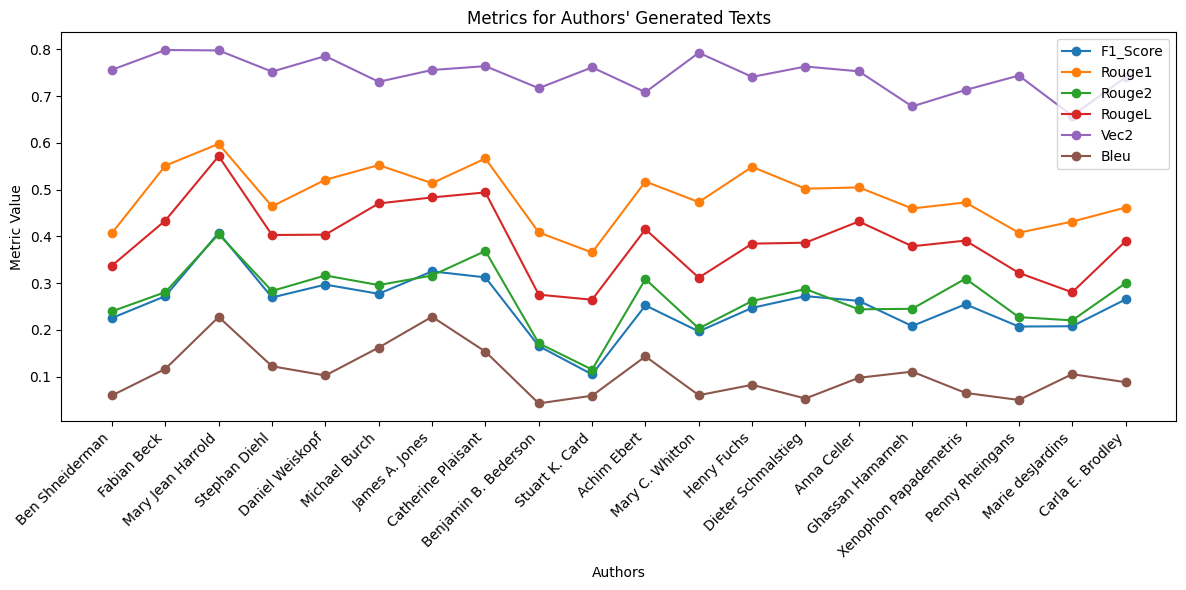

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('combined_metrics2.csv')

# List of authors
authors = data['Name'].unique()

# Metrics to visualize
metrics = ['F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Vec2', 'Bleu']

# Plot settings
plt.figure(figsize=(12, 6))

# Loop through each metric
for metric in metrics:
    plt.plot(authors, data.groupby('Name')[metric].mean(), marker='o', label=metric)

plt.title('Metrics for Authors\' Generated Texts')
plt.xlabel('Authors')
plt.ylabel('Metric Value')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('combined_metrics2.csv')

# Group the data by 'Name' and calculate the mean for F1 Score, Rouge, Length, and Vec2
grouped_data = data.groupby('Name')[['F1_Score', 'Rouge1', 'Rouge2', 'RougeL', 'Length', 'Vec2', 'Bleu']].mean()

# Get the unique names of the authors in the same order as in the CSV file
unique_names = data['Name'].unique()

# Create a list to hold the results
results = []

# Populate the results list with author metrics
for name in unique_names:
    author_metrics = grouped_data.loc[name]
    results.append([name, author_metrics['F1_Score'], author_metrics['Rouge1'], author_metrics['Rouge2'], author_metrics['RougeL'], author_metrics['Length'], author_metrics['Vec2'], author_metrics['Bleu']])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Name', 'Mean F1 Score', 'Mean Rouge1', 'Mean Rouge2', 'Mean RougeL', 'Mean Length', 'Mean Vec2', 'Mean Bleu'])

# Save the results to a CSV file
results_df.to_csv('author_mean_metrics2.csv', index=False)


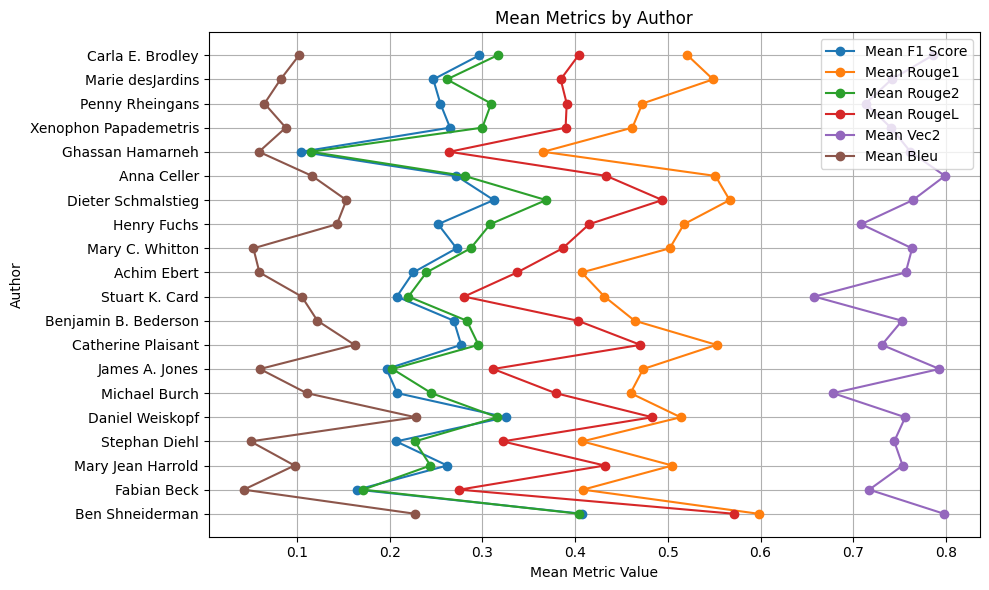

In [6]:
# Create a line plot for all metrics
plt.figure(figsize=(10, 6))
metrics = ['Mean F1 Score', 'Mean Rouge1', 'Mean Rouge2', 'Mean RougeL','Mean Vec2', 'Mean Bleu']

for metric in metrics:
    plt.plot(results_df[metric], results_df['Name'], marker='o', linestyle='-', label=metric)

plt.xlabel('Mean Metric Value')
plt.ylabel('Author')
plt.title('Mean Metrics by Author')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()